In [3]:
%pylab inline
import numpy as np 

Populating the interactive namespace from numpy and matplotlib


# Information Gain

Decision Tree에서 **maximize**해야될 objective function입니다.

### $$ IG(D_p, f) = I(D_p) - \sum^c_{j=1} \frac{N_j}{N_p} I(D_j) $$

| Symbol | Description |
|:-------|:------------|
| $ IG() $ | Information Gain 함수로서 maximize해야 됨 |
| $ D_p $ | 부모 노드의 Dataset |
| $ D_j $ | 자식 노드의 Dataset |
| $ f $ | 나누려는 feature |
| $ I $ | Impurity measure |
| $ N_p $ | 부모노드의 전체 샘플 갯수 |
| $ N_j $ | 자식노드의 전체 샘플 갯수 |

위의 공식에서 보듯이, Information Gain이란 *(부모 노드의 Impurity)*와 *(자식노드 Impurity의 합)*의 차이입니다. <br>
**자식노드의 impurity가 낮을수록, Information Gain의 값은 높아집니다.**

하지만 대부분 검색효율화를 위해서 Binary Decision Tree를 주로 사용합니다. (2개의 자식노드만을 갖음)<br>
공식은 다음과 같습니다.

### $$ IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{ N_{right}}{N_p} I(D_{right})  $$


# Entropy

$ p_i = p(i|t) $ 로서 특정 노드의 클래스 비율을 뜻함. 

### $$ I_H(t) = -\sum^c_{i=1} p_i log_2 p_i $$

| Symbol | Description |
|:-------|:------------|
| $ p(i\ |\ t) $ | 특정 노드 t에서 클래스 c에 속하는 샘플들의 비율(proportion) |

모든 샘플들이 동일한 하나의 class로 분류된다면, entropy의 값은 0이 되며, <br>
entropy갑싱 uniform class distribution (쉽게 말해.. 고르게 분산)을 갖었다면, maximum value(1)을 갖게 됩니다.

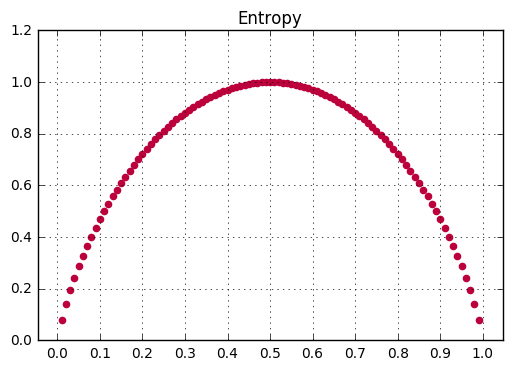

In [25]:
def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1-p))

x = np.arange(0.01, 1, 0.01)
y = entropy(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Entropy')
scatter(x, y, color='#BB003C')

# Gini Impurity

misclassification의 확률을 **Minimize**하는것이 목표<br>
$ p = p(i|t) $ 로서 특정 노드의 클래스 비율을 뜻함. 

### $$ I_G(t) = \sum^c_{i=1} p \cdot (1 - p_i) = 1 - \sum^c_{i=1} p_i^2 $$

Entropy와 동일하게, classes들이 완벽하게 섞였을때 (즉 binary class setting ... c=2 일때 proportion값은 0.5) 가장 높은(maximal)값이 나옵니다.

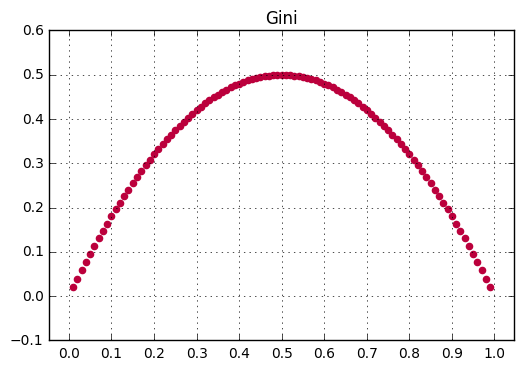

In [28]:
def gini(p):
    return 1 - (p**2 + (1-p)**2)

x = np.arange(0.01, 1, 0.01)
y = gini(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Gini')
scatter(x, y, color='#BB003C')